#### *Exercise 4.9*

#### Implement value iteration for the gambler’s problem and solve it for ph = 0.25 and ph = 0.55. In programming, you may find it convenient to introduce two dummy states corresponding to termination with capital of 0 and 100, giving them values of 0 and 1 respectively. Show your results graphically, as in Figure 4.3. Are your results stable as Δ ← 0?

---
#### Resposta 1:

#### Constantes e definições

In [1]:
import matplotlib.pyplot as plt

In [2]:
# Constantes
CAPITAL_GOAL = 100
DISCOUNT_FACTOR = 1
ERROR_THRESHOLD = 0

In [3]:
# Estados
STATES = tuple(range(0, CAPITAL_GOAL + 1))
TERMINAL_STATES = 0, CAPITAL_GOAL
NON_TERMINAL_STATES = tuple((s for s in STATES if s not in TERMINAL_STATES))

In [4]:
def actions_set(state):
    # Escolher apostas a partir de 1 para obrigar ao apostador sempre apostar alguma coisa,
    # caso contrário muitas vezes é melhor pro apostador permanecer no mesmo capital do que tentar apostar
    return range(1, min(state, CAPITAL_GOAL - state) + 1)

In [5]:
def reward_expectation(state, action, head_probability, state_values):
    # Recompensa esperada ao tirar coroa
    reward_1 = (1 - head_probability) * DISCOUNT_FACTOR * state_values[state - action]
    # Recompensa esperada ao tirar cara
    reward_2 =  head_probability * DISCOUNT_FACTOR * state_values[state + action]
    return reward_1 + reward_2

In [6]:
def get_optimal_policy(head_probability, state_values):
    policy = {s: 0 for s in STATES}
    for s in NON_TERMINAL_STATES:
        policy[s] = max(actions_set(s), key=lambda a: reward_expectation(s, a, head_probability, state_values))
    return policy

In [7]:
def plot_results(state_values, policy):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))
    fig.suptitle(f' Solution to the gambler’s problem for ph = {head_probability}')

    # Capital x Value estimates
    ax1.plot(state_values.keys(), state_values.values())
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.set_xlabel('Captial')
    ax1.set_ylabel('Value Estimates')

    # Captial x Final policy (stakes)
    ax2.bar(policy.keys(), policy.values(), fill=False, width=1)
    ax2.spines["top"].set_visible(False)
    ax2.spines["right"].set_visible(False)
    ax2.set_xlabel('Captial')
    ax2.set_ylabel('Final policy (stakes)')

#### 1º Cenário: ph = 0.25

In [8]:
head_probability = 0.25
state_values = {s: int(s == CAPITAL_GOAL) for s in STATES}

In [9]:
# Value Iteration

iteration = 1
error = None
while error is None or error > ERROR_THRESHOLD:
    error = 0
    for s in NON_TERMINAL_STATES:
        v = state_values[s]
        state_values[s] = max(reward_expectation(s, a, head_probability, state_values) for a in actions_set(s))
        error = max(error or 0, abs(v - state_values[s]))
    iteration += 1

In [10]:
policy = get_optimal_policy(head_probability, state_values)

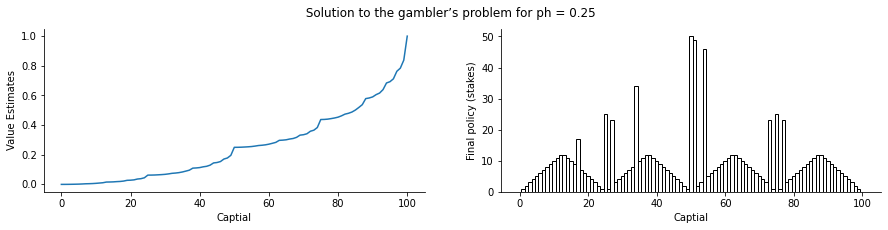

In [11]:
plot_results(state_values, policy)

#### 2º Cenário: ph = 0.55

In [12]:
head_probability = 0.55
state_values = {s: int(s == CAPITAL_GOAL) for s in STATES}

In [13]:
# Value Iteration

iteration = 1
error = None
while error is None or error > ERROR_THRESHOLD:
    error = 0
    for s in NON_TERMINAL_STATES:
        v = state_values[s]
        state_values[s] = max(reward_expectation(s, a, head_probability, state_values) for a in actions_set(s))
        error = max(error or 0, abs(v - state_values[s]))
    iteration += 1

In [14]:
policy = get_optimal_policy(head_probability, state_values)

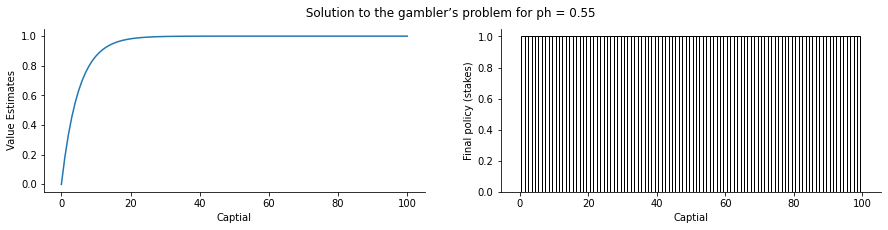

In [15]:
plot_results(state_values, policy)